# **CNN**

## DOWNLOAD THE DATASET

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
#!unzip gdrive/My\ Drive/dataset/Flowers-Dataset.zip
import shutil
shutil.unpack_archive('/content/gdrive/MyDrive/dataset/Flowers-Dataset.zip', '/content/gdrive/MyDrive/dataset/')

## IMAGE AUGMENTATION

In [32]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
train_datagen=ImageDataGenerator(rescale=1./255,zoom_range=0.2,horizontal_flip=True,vertical_flip=False)

In [ ]:
test_datagen=ImageDataGenerator(rescale=1./255)

In [33]:
pip install split-folders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [34]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
import matplotlib.pyplot as plt

In [35]:
batch_size = 16

## IMAGE AUGMENTATION



In [36]:
data_augmentation = Sequential(
  [
    layers.RandomFlip("horizontal",input_shape=(180, 180, 3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
  ]
)

SPLITTING DATASET INTO TRAINING AND TESTING

In [37]:
train_data_set = tf.keras.utils.image_dataset_from_directory(
  "/content/gdrive/MyDrive/dataset/flowers",
  validation_split=0.25,
  subset="training",
  seed=132,
  image_size=(180, 180),
  batch_size=batch_size)

Found 4317 files belonging to 5 classes.
Using 3238 files for training.


In [38]:
val_data_set = tf.keras.utils.image_dataset_from_directory(
  "/content/gdrive/MyDrive/dataset/flowers",
  validation_split=0.25,
  subset="validation",
  seed=132,
  image_size=(180, 180),
  batch_size=batch_size)

Found 4317 files belonging to 5 classes.
Using 1079 files for validation.


In [39]:
class_names = train_data_set.class_names

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  after removing the cwd from sys.path.


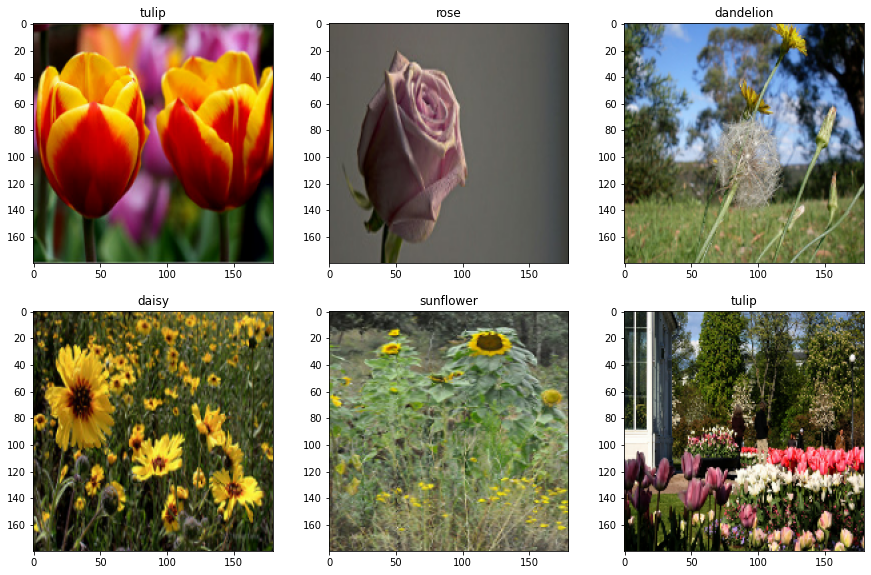

In [40]:
plt.figure(figsize=(15, 15))
for images, labels in train_data_set.take(3):
  for i in range(6):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])

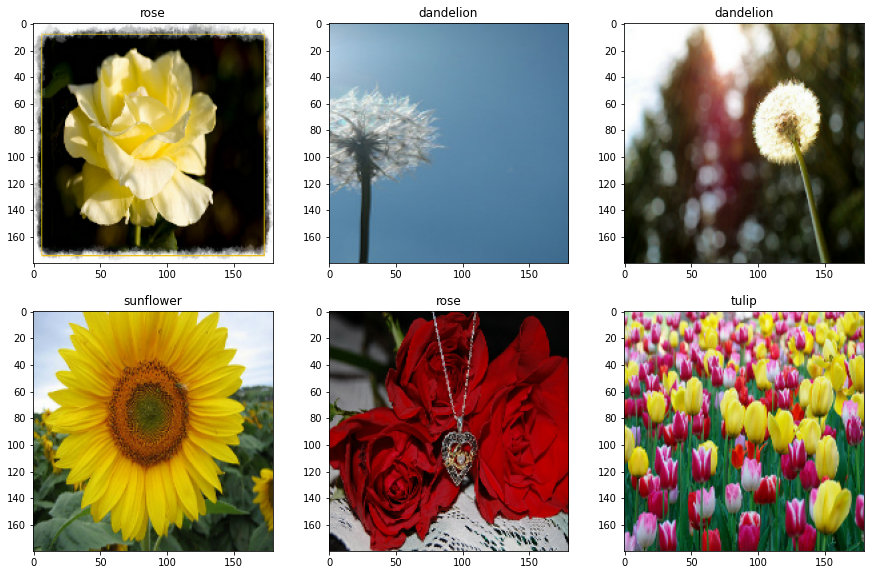

In [42]:
plt.figure(figsize=(15, 15))
for images, labels in train_data_set.take(1):
  for i in range(6):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])

### Normalizing pixel value from 0-255 to 0-1

In [43]:
normalization_layer = layers.Rescaling(1./255)

In [44]:
dataset_normalized = train_data_set.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(dataset_normalized))
first_image = image_batch[0]
print(np.min(first_image), np.max(first_image))

0.0 1.0


## MODEL CREATION AND ADDING OF LAYERS

In [45]:
num_classes = len(class_names)

model = Sequential([
  data_augmentation,
  layers.Rescaling(1./255, input_shape=(180, 180, 3)),
  # adding convolutional layer
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  # adding maxpooling layer
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  # adding flatten
  layers.Flatten(),
  # adding dense hidden layer
  layers.Dense(128, activation='relu'),
  # adding dense output layer
  layers.Dense(num_classes)
])

## COMPILATION OF MODEL

In [46]:
# compiling model with categorical cross entropy and adam optimizer
model.compile(optimizer='adam',
loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
metrics=['accuracy'])

## FITTING THE MODEL

In [48]:
epochs=15
history = model.fit(train_data_set,validation_data=val_data_set,epochs=epochs)

Epoch 1/15
203/203 [==============================] - 140s 687ms/step - loss: 1.1783 - accuracy: 0.5108 - val_loss: 1.0397 - val_accuracy: 0.6070
Epoch 2/15
203/203 [==============================] - 137s 675ms/step - loss: 0.9578 - accuracy: 0.6269 - val_loss: 1.1498 - val_accuracy: 0.5820
Epoch 3/15
203/203 [==============================] - 137s 673ms/step - loss: 0.8652 - accuracy: 0.6634 - val_loss: 1.1209 - val_accuracy: 0.5848
Epoch 4/15
203/203 [==============================] - 137s 671ms/step - loss: 0.8155 - accuracy: 0.6890 - val_loss: 0.9609 - val_accuracy: 0.6367
Epoch 5/15
203/203 [==============================] - 137s 671ms/step - loss: 0.7899 - accuracy: 0.6933 - val_loss: 0.9754 - val_accuracy: 0.6358
Epoch 6/15
203/203 [==============================] - 136s 669ms/step - loss: 0.7366 - accuracy: 0.7214 - val_loss: 0.8889 - val_accuracy: 0.6756
Epoch 7/15
203/203 [==============================] - 136s 670ms/step - loss: 0.6770 - accuracy: 0.7406 - val_loss: 0.9452 -

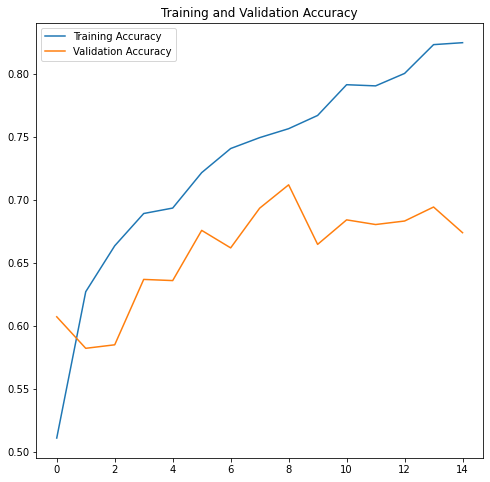

In [49]:
epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.plot(epochs_range, history.history['accuracy'], label='Training Accuracy')
plt.plot(epochs_range, history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.show()

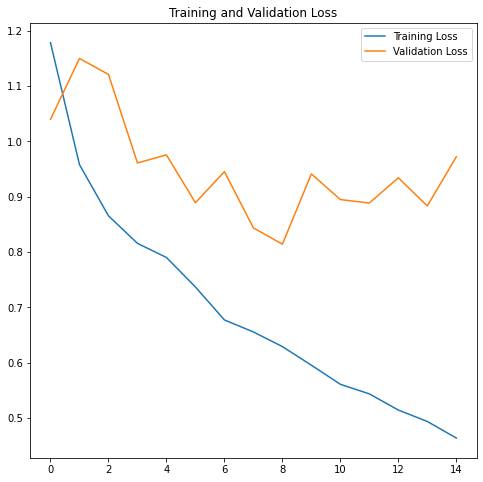

In [50]:
plt.figure(figsize=(8, 8))
plt.plot(epochs_range, history.history['loss'], label='Training Loss')
plt.plot(epochs_range, history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()

## SAVING THE MODEL

In [30]:
model.save("CNN Model for Classification Of Flowers.h5")

In [31]:
model.load_weights('CNN Model for Classification Of Flowers.h5')

## TESTING THE MODEL

In [53]:
sunflower_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/592px-Red_sunflower.jpg"
sunflower_path = tf.keras.utils.get_file('Red_sunflower', origin=sunflower_url)

img = tf.keras.utils.load_img(
    sunflower_path, target_size=(180, 180)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(class_names[np.argmax(score)],100 * np.max(score))

sunflower 96.74870371818542
